### softmax

[ 0.8360188   0.11314284  0.05083836]
[  9.99999998e-01   2.06115362e-09   6.91440009e-13]
[ 0.38842275  0.31801365  0.2935636 ]


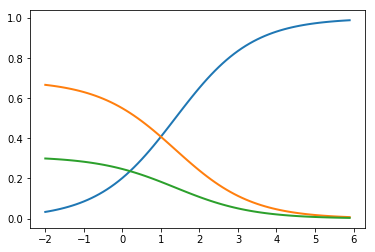

In [9]:
"""softmax"""
#将计算结果转换为概率的形式
import numpy as np
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)
scores=[3.0,1.0,0.2]
print(softmax(scores))
print(softmax([ i*10 for i in scores ]))
print(softmax([i/10.0 for i in scores]))
import matplotlib.pyplot as plt
x=np.arange(-2.0,6.0,0.1)
scores=np.vstack([x,np.ones_like(x),0.2*np.ones_like(x)])
plt.plot(x,softmax(scores).T,linewidth=2)
#print(softmax(scores))
plt.show()

### 线性模型中，首先使用$ W^Tx+b $计算，然后将计算结果使用softmax函数转换为概率的形式，接着结合one_hot编码，使用交叉熵进行classify.
### 交叉熵
(1) $ D(S,L)=-\sum_{i}L_ilog(S_i) $ <br>
(2) $ D(S(W^Tx_i+b),L_i) $ <br>
(3) $ Loss=\dfrac{1}{N}\sum_{i}D(S(W^Tx_i+b),L_i) $ <br>
minimize Loss <br>
** 注意：** $ D(S,L)!=D(L,S) $
### 数值计算的稳定性：注意计算值过大或者过小
- 一个很好的指导原则就是：我们总希望我们的变量具有均值为零，同方差的性质！！！
比如针对一张图片的像素点0-255，可以这样变换$ \dfrac{x-128}{128} $

In [12]:
a=1000000000
for i in range(1000000):
    a=a+0.000001
a=a-1000000000
print(a)
#理论结果应该是0.9，但是得到计算的结果是0.95左右？
#很大的数加上很小的数字的时候存在数值计算的稳定性的问题！！！

0.95367431640625


### 多项式拟合实验M=0，1，3，9

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
      9         8        7        6        5         4         3
-398 x + 91.59 x + 2967 x - 5573 x + 3846 x - 925.8 x - 3.703 x
          2
 - 15.04 x + 10.55 x - 1.106e-13


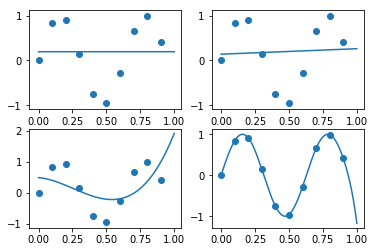

In [43]:
import numpy as np
import matplotlib.pyplot as plt
X=np.arange(0,1,0.1)
test=np.arange(0,1,0.000001)
Y=np.sin(X*10)

plt.subplot(221)
plt.scatter(X,Y)
Z0=np.polyfit(X,Y,0)
P0=np.poly1d(Z0)
plt.plot(test,P0(test))

plt.subplot(222)
plt.scatter(X,Y)
Z1=np.polyfit(X,Y,1)
P1=np.poly1d(Z1)
plt.plot(test,P1(test))

plt.subplot(223)
plt.scatter(X,Y)
Z3=np.polyfit(X,Y,3)
P3=np.poly1d(Z3)
plt.plot(test,P3(test))

plt.subplot(224)
plt.scatter(X,Y)
Z9=np.polyfit(X,Y,9)
P9=np.poly1d(Z9)
plt.plot(test,P9(test))
print(P9)
plt.show()

### 独立同分布
### 独立
### 不相关
### 独立和不相关的关系

# 范式
![](p_norm.png)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


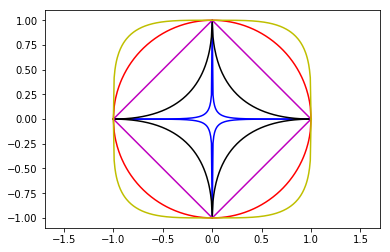

In [3]:
import numpy as np
from matplotlib.pyplot import *

figure(); hold(True)
r = 1
linestyle = ['b-','k-','m-','r-','y-']
p_values = (0.25, 0.5, 1, 2, 4)
for i,p in enumerate(p_values):
    x = np.arange(-r,r+1e-5,1/128.0)
    y = (r**p - (abs(x)**p))**(1.0/p)
    y = list(zip(y, -y))
    plot(x, y, linestyle[i], label=str(i))
axis('equal')
show()

In [40]:
#协方差矩阵计算
import numpy as np
sample=np.array([[49,7,29],[8,19,16],[12,8,14],[19,37,22],[3,43,21],[34,17,17],[20,34,27],[49,14,37],[20,26,21],[31,41,21]]).T
print (sample.shape)

print(sample)
print(np.cov(sample))

#手动计算
#python中np.cov返回的是一个矩阵
# np.cov(x,y)返回对应数学公式里的[[cov(x,x),cov(x,y)],[cov(y,x),cov(y,y)]]
for i in range(size0):
    for j in range(size0):
        sample_cov[i][j]=np.cov(sample[i],sample[j])[0][1]
print(sample_cov)



(3, 10)
[[49  8 12 19  3 34 20 49 20 31]
 [ 7 19  8 37 43 17 34 14 26 41]
 [29 16 14 22 21 17 27 37 21 21]]
[[ 254.94444444  -96.55555556   76.38888889]
 [ -96.55555556  182.04444444   -7.44444444]
 [  76.38888889   -7.44444444   47.16666667]]
[[ 254.94444444  -96.55555556   76.38888889]
 [ -96.55555556  182.04444444   -7.44444444]
 [  76.38888889   -7.44444444   47.16666667]]


In [19]:
#求解两个向量的余弦相似性
import numpy as np
a=np.array([1,2,3])
b=np.array([-8,1,2])
A=np.matrix(a).T
B=np.matrix(b).T
num=float(A.T*B)
denom=np.linalg.norm(A)*np.linalg.norm(B)
cos=num/denom
#顾名思义，linalg=linear+algebra，norm则表示范数
#首先需要注意的是范数是对向量（或者矩阵）的度量，是一个标量（scalar）
#norm(x, ord=None, axis=None, keepdims=False)
#
print(np.linalg.norm(A))
print(cos)
#归一化，将结果调整到0-1区间
sim=0.5+0.5*cos
print(sim)
#使用C++实现余弦相似度计算

3.74165738677
0.0
0.5
